# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
#full url: https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=metric"
    #url + "appid=" + api_key + "&q=" + city
    #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    #https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid={API key}&units=metric
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | searcy
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | mindelo
Processing Record 5 of Set 1 | shache
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | agadir
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | touros
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | wageningen
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 o

Processing Record 38 of Set 4 | konevo
Processing Record 39 of Set 4 | linxia
Processing Record 40 of Set 4 | la ronge
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | fairbanks
Processing Record 43 of Set 4 | haines junction
Processing Record 44 of Set 4 | puerto escondido
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | burnie
Processing Record 49 of Set 4 | talawdi
City not found. Skipping...
Processing Record 0 of Set 5 | kodiak
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | dawei
Processing Record 3 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 4 of Set 5 | stromness
Processing Record 5 of Set 5 | arraial do cabo
Processing Record 6 of Set 5 | hailar
Processing Record 7 of Set 5 | pakxan
Processing Record 8 of Set 5 | khandbari
Processing Record 9 of Set 5 | nizhneyansk
City not found. Skipping...
P

Processing Record 29 of Set 8 | gitarama
Processing Record 30 of Set 8 | tabarqah
City not found. Skipping...
Processing Record 31 of Set 8 | ostersund
Processing Record 32 of Set 8 | pentecoste
Processing Record 33 of Set 8 | port said
Processing Record 34 of Set 8 | vao
Processing Record 35 of Set 8 | naryan-mar
Processing Record 36 of Set 8 | korla
Processing Record 37 of Set 8 | stokmarknes
Processing Record 38 of Set 8 | airai
Processing Record 39 of Set 8 | bandarbeyla
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | chuy
Processing Record 42 of Set 8 | acajutla
Processing Record 43 of Set 8 | luderitz
Processing Record 44 of Set 8 | polotnyanyy zavod
Processing Record 45 of Set 8 | nelson bay
Processing Record 46 of Set 8 | malanje
Processing Record 47 of Set 8 | joshimath
Processing Record 48 of Set 8 | sabzevar
Processing Record 49 of Set 8 | shar
Processing Record 0 of Set 9 | ormara
Processing Record 1 of Set 9 | boyolangu
Processing Record 2 of Set 9 | b

Processing Record 18 of Set 12 | normandin
Processing Record 19 of Set 12 | maniitsoq
Processing Record 20 of Set 12 | seoul
Processing Record 21 of Set 12 | ust-kulom
Processing Record 22 of Set 12 | jaca
Processing Record 23 of Set 12 | riberalta
Processing Record 24 of Set 12 | oriximina
Processing Record 25 of Set 12 | albanel
Processing Record 26 of Set 12 | coracao de jesus
Processing Record 27 of Set 12 | jammalamadugu
Processing Record 28 of Set 12 | chulman
Processing Record 29 of Set 12 | bethanien
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | bealanana
Processing Record 32 of Set 12 | ust-bolsheretsk
City not found. Skipping...
Processing Record 33 of Set 12 | le mars
Processing Record 34 of Set 12 | kavaratti
Processing Record 35 of Set 12 | caravelas
Processing Record 36 of Set 12 | whitecourt
Processing Record 37 of Set 12 | kamina
Processing Record 38 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 39 of Set 12 | bose
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.5167,57.5167,25.21,94,75,0.51,MU,1681258963
1,searcy,35.2506,-91.7363,22.00,32,0,2.57,US,1681258963
2,provideniya,64.3833,-173.3000,-16.94,51,0,8.00,RU,1681258964
3,mindelo,16.8901,-24.9804,21.75,64,0,3.60,CV,1681258964
4,shache,38.4167,77.2406,12.63,19,1,2.72,CN,1681258965


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,souillac,-20.5167,57.5167,25.21,94,75,0.51,MU,1681258963
1,searcy,35.2506,-91.7363,22.00,32,0,2.57,US,1681258963
2,provideniya,64.3833,-173.3000,-16.94,51,0,8.00,RU,1681258964
3,mindelo,16.8901,-24.9804,21.75,64,0,3.60,CV,1681258964
4,shache,38.4167,77.2406,12.63,19,1,2.72,CN,1681258965


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

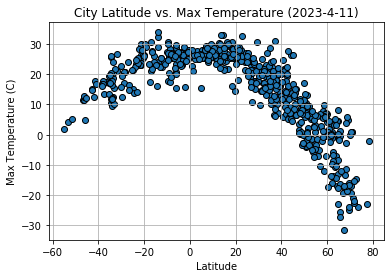

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-4-11)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

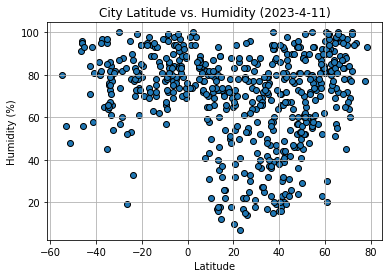

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude, humidity, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-4-11)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

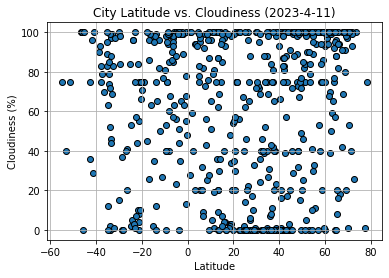

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-4-11)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

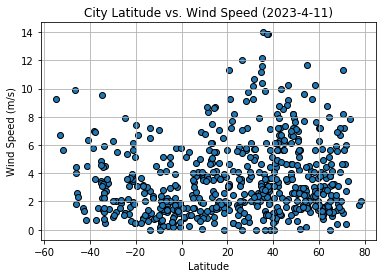

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude, wind, edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-4-11)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
#slope, yint, r, p, ste= st.linregress(x, y)
#regression = slope*(x)+ yint

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,searcy,35.2506,-91.7363,22.00,32,0,2.57,US,1681258963
2,provideniya,64.3833,-173.3000,-16.94,51,0,8.00,RU,1681258964
3,mindelo,16.8901,-24.9804,21.75,64,0,3.60,CV,1681258964
4,shache,38.4167,77.2406,12.63,19,1,2.72,CN,1681258965
6,dingle,10.9995,122.6711,25.51,72,100,0.85,PH,1681258966


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,souillac,-20.5167,57.5167,25.21,94,75,0.51,MU,1681258963
5,bluff,-46.6000,168.3333,11.56,91,100,9.91,NZ,1681258966
7,atuona,-9.8000,-139.0333,27.35,77,81,7.05,PF,1681258967
8,busselton,-33.6500,115.3333,18.77,79,46,4.54,AU,1681258967
9,ushuaia,-54.8000,-68.3000,1.81,80,75,9.26,AR,1681258968


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8744196997479704


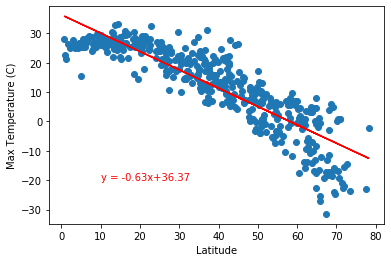

In [15]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

nslope, nyint, nr, _, _= linregress(north_lat, north_temp)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_temp)
plt.plot(north_lat, north_regression, color='red')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.text(10,-20, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()



The r-value is: 0.7218370103338267


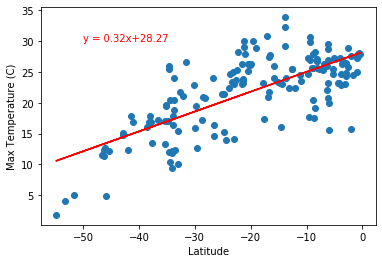

In [16]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

sslope, syint, sr, _, _= linregress(south_lat, south_temp)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_temp)
plt.plot(south_lat, south_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.text(-50,30, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:**  The high r-values are indicators of a strong linear relationship between temperature and latitude depending on hemisphere.  In the northern hemisphere, as the latitude goes up, the temperature goes down.  In the southern hemisphere, as the latitude goes up the temperature increases.  Therefore, the temperature goes down the closer in latitude to the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.22773667696040512


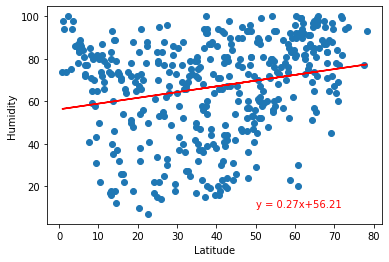

In [17]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_hum = northern_hemi_df["Humidity"]

nslope, nyint, nr, _, _= linregress(north_lat, north_hum)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_hum)
plt.plot(north_lat, north_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(50,10, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: 0.17980444775770552


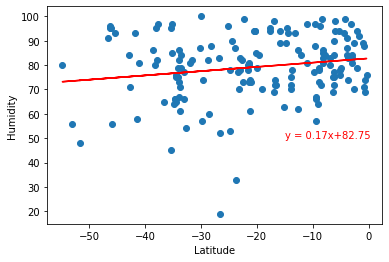

In [18]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_hum = southern_hemi_df["Humidity"]

sslope, syint, sr, _, _= linregress(south_lat, south_hum)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_hum)
plt.plot(south_lat, south_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-15,50, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:**  While a slight correlation is present in these data, there is only a small linear relationship between latitude and humidity.  There is a positive linear relationship between latitude and humidity but I argue this relationship is not strong as indicated by the low r-values.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21687467175312924


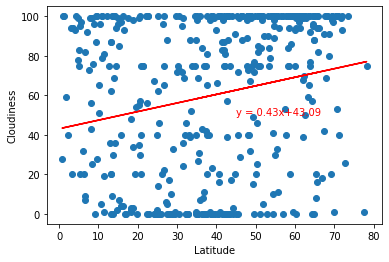

In [19]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_cloud = northern_hemi_df["Cloudiness"]

nslope, nyint, nr, _, _= linregress(north_lat, north_cloud)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, north_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(45,50, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: 0.09481279191278451


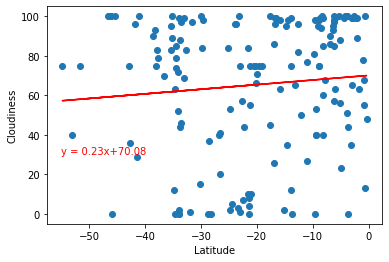

In [20]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Cloudiness"]

sslope, syint, sr, _, _= linregress(south_lat, south_cloud)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, south_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55,30, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:**  While there is a linear relationship between latitude and cloudiness, this relationship is quite small and in the southern hemisphere there may be none at all.  Both r-values are small and the southern hemisphere are value is incredibly small so while both linear regressions indicate a positive linear relationship between latitude and cloudiness, these relationships are very small.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.036243011151036994


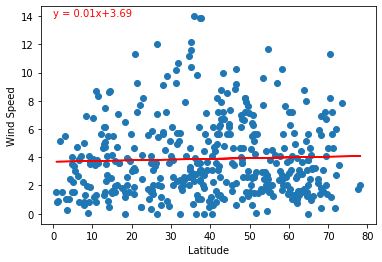

In [21]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_wind = northern_hemi_df["Wind Speed"]

nslope, nyint, nr, _, _= linregress(north_lat, north_wind)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_wind)
plt.plot(north_lat, north_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(0,14, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: -0.3519960744795872


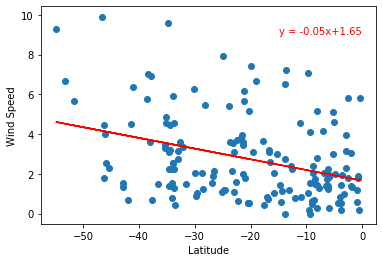

In [22]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_wind = southern_hemi_df["Wind Speed"]

sslope, syint, sr, _, _= linregress(south_lat, south_wind)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_wind)
plt.plot(south_lat, south_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-15,9, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:**  There may be a relationship between wind speed and latitude but it is not very large as indicated by the low r-values and depends on the hemisphere.  In the northern hemisphere, it is unlikely there is a linear relationship between wind speed and latitude at all as r-value is almost 0.  In the southern hemisphere, there is a negative linear relationship between latitude and wind speed that is of low to medium strength as indicated by a somewhat low r-value.